In [1]:
import pandas as pd

In [2]:
with open('/Users/betul/kataloglar silivri/kandilli_catalog.csv', 'r') as file:
    lines = file.readlines()

In [3]:
df= pd.DataFrame(lines)

In [4]:
data = [line.strip().split(',') for line in lines]


In [5]:
df= pd.DataFrame(data)

In [6]:
df

,0,1,2,3,4,5,6
0,orgtime,station,p_arrival_time,s_arrival_time,event_lat,event_lon,event_dep
1,2019-09-01T01:14:47.100000,APMY,2019-09-01T01:14:55.900000,2019-09-01T01:15:03.300000,37.8495,29.6362,9000.0
2,2019-09-01T01:14:47.100000,AYDB,2019-09-01T01:15:13.300000,,37.8495,29.6362,9000.0
3,2019-09-01T01:14:47.100000,BASM,2019-09-01T01:14:54.100000,,37.8495,29.6362,9000.0
4,2019-09-01T01:14:47.100000,CAME,2019-09-01T01:15:05.900000,2019-09-01T01:15:19.600000,37.8495,29.6362,9000.0
...,...,...,...,...,...,...,...
75571,2019-12-31T23:23:19.800000,AGRB,2019-12-31T23:23:49.100000,,37.9537,42.9645,10900.0
75572,2019-12-31T23:23:19.800000,AKDM,2019-12-31T23:23:27.500000,2019-12-31T23:23:33.500000,37.9537,42.9645,10900.0
75573,2019-12-31T23:23:19.800000,CUKT,2019-12-31T23:23:37.200000,2019-12-31T23:23:49.500000,37.9537,42.9645,10900.0
75574,2019-12-31T23:23:19.800000,GURO,2019-12-31T23:23:38.400000,2019-12-31T23:23:52.100000,37.9537,42.9645,10900.0


In [7]:
df.columns=df.iloc[0]

In [8]:
df=df.iloc[1:]

In [9]:
df

,orgtime,station,p_arrival_time,s_arrival_time,event_lat,event_lon,event_dep
1,2019-09-01T01:14:47.100000,APMY,2019-09-01T01:14:55.900000,2019-09-01T01:15:03.300000,37.8495,29.6362,9000.0
2,2019-09-01T01:14:47.100000,AYDB,2019-09-01T01:15:13.300000,,37.8495,29.6362,9000.0
3,2019-09-01T01:14:47.100000,BASM,2019-09-01T01:14:54.100000,,37.8495,29.6362,9000.0
4,2019-09-01T01:14:47.100000,CAME,2019-09-01T01:15:05.900000,2019-09-01T01:15:19.600000,37.8495,29.6362,9000.0
5,2019-09-01T01:14:47.100000,GORD,2019-09-01T01:15:15.800000,,37.8495,29.6362,9000.0
...,...,...,...,...,...,...,...
75571,2019-12-31T23:23:19.800000,AGRB,2019-12-31T23:23:49.100000,,37.9537,42.9645,10900.0
75572,2019-12-31T23:23:19.800000,AKDM,2019-12-31T23:23:27.500000,2019-12-31T23:23:33.500000,37.9537,42.9645,10900.0
75573,2019-12-31T23:23:19.800000,CUKT,2019-12-31T23:23:37.200000,2019-12-31T23:23:49.500000,37.9537,42.9645,10900.0
75574,2019-12-31T23:23:19.800000,GURO,2019-12-31T23:23:38.400000,2019-12-31T23:23:52.100000,37.9537,42.9645,10900.0


In [10]:
df=df.reset_index(drop =True)

In [11]:
df.orgtime=pd.to_datetime(df.orgtime)

In [12]:
kandilli=df

In [13]:
rename_map = {
    "orgtime": "kd_orgtime",
    "station": "kd_station",
    "p_arrival_time": "kd_parrival",
    "s_arrival_time": "kd_sarrival",
    "event_lat": "kd_lat",
    "event_lon": "kd_lon",
    "event_dep": "kd_dep"
}

kandilli = kandilli.rename(columns=rename_map)


In [14]:
kandilli_all=kandilli

In [15]:
kd2 = kandilli.groupby("kd_orgtime", as_index=False).agg({
    "kd_lat": "first",
    "kd_lon": "first"
})

In [16]:
kd2.head()

,kd_orgtime,kd_lat,kd_lon
0,2019-09-01 01:14:47.100,37.8495,29.6362
1,2019-09-01 01:22:38.100,40.5463,30.5667
2,2019-09-01 01:40:46.700,37.565,26.8188
3,2019-09-01 02:15:42.100,37.3455,29.8268
4,2019-09-01 02:31:08.600,37.3552,29.832


In [17]:
kandilli_all=kd2

In [18]:
kandilli_all

,kd_orgtime,kd_lat,kd_lon
0,2019-09-01 01:14:47.100,37.8495,29.6362
1,2019-09-01 01:22:38.100,40.5463,30.5667
2,2019-09-01 01:40:46.700,37.565,26.8188
3,2019-09-01 02:15:42.100,37.3455,29.8268
4,2019-09-01 02:31:08.600,37.3552,29.832
...,...,...,...
5927,2019-12-31 22:42:32.900,39.1062,27.8843
5928,2019-12-31 22:46:16.000,37.8397,29.6257
5929,2019-12-31 23:01:37.900,38.5818,27.471
5930,2019-12-31 23:09:31.500,38.5722,27.4723


## PhaseNET hyp: 

In [19]:
with open('/Users/betul/phasenet_hyp/hypsum_phs.out', 'r') as file:
    lines = file.readlines()

In [20]:
lines

[' Date    Origin    Lat      Long      Depth    Mag No Gap Dmin  Rms  Erh  Erz  Erx      Cvxy      Cvxz      Cvyz     Oterr\n',
 ' Date    Origin    Lat      Long      Depth    Mag No Gap Dmin  Rms  Erh  Erz  Erx      Cvxy      Cvxz      Cvyz     Oterr\n',
 '190901 0710 20.89 39 17.49  28 24.92   25.0    0.0  6 248108.3 8.07236.4424.9122.0-0.158E+05 0.236E+05-0.542E+05 0.128E+02\n',
 '190903 0407 25.34 40 15.67  26 51.51    1.9    0.0  6 227 36.0 0.34  9.7  5.6  3.2 0.124E+02-0.364E+01-0.293E+02 0.655E+00\n',
 '190903 0643 38.03 41  2.20  27 23.15   25.0    0.0  8 200 71.8 4.28 78.0 62.9 46.1-0.130E+04-0.306E+03-0.192E+04 0.754E+01\n',
 '190903 0721 47.85 40 47.91  28 36.97    3.4    0.0  6 326 44.5 0.53999.9999.9999.9 0.224E+08-0.548E+08-0.608E+08 0.109E+01\n',
 '190903 0941 38.26 40  8.18  27 14.87    8.0    0.0  6 189 38.7 1.19 18.0119.5  9.7 0.202E+02 0.239E+03-0.106E+04 0.206E+01\n',
 '190903 1437 59.71 41 22.78  29 22.09    3.8    0.0  6 330 43.5 0.59999.9999.9999.9 0.354E+08 0.

In [21]:
updated_lines=[i.replace("  "," ").replace("   "," ").replace("  "," ") for i in lines]

In [22]:
data = [line.strip().split(' ') for line in updated_lines]
temp_df=pd.DataFrame(data)
temp_df.columns=temp_df.iloc[0]
temp_df=temp_df.iloc[2:]
temp_df['Date']='20'+temp_df['Date']

In [23]:
temp_df.head()

,Date,Origin,Lat,Long,Depth,Mag,No,Gap,Dmin,Rms,Erh,Erz,Erx,Cvxy,Cvxz,Cvyz,Oterr,NaN,NaN,NaN
2,20190901,0710,20.89,39,17.49,28,24.92,25.0,0.0,6,248108.3,8.07236.4424.9122.0-0.158E+05,0.236E+05-0.542E+05,0.128E+02,None,None,None,None,None,None
3,20190903,0407,25.34,40,15.67,26,51.51,1.9,0.0,6,227,36.0,0.34,9.7,5.6,3.2,0.124E+02-0.364E+01-0.293E+02,0.655E+00,None,None
4,20190903,0643,38.03,41,2.20,27,23.15,25.0,0.0,8,200,71.8,4.28,78.0,62.9,46.1-0.130E+04-0.306E+03-0.192E+04,0.754E+01,None,None,None
5,20190903,0721,47.85,40,47.91,28,36.97,3.4,0.0,6,326,44.5,0.53999.9999.9999.9,0.224E+08-0.548E+08-0.608E+08,0.109E+01,None,None,None,None,None
6,20190903,0941,38.26,40,8.18,27,14.87,8.0,0.0,6,189,38.7,1.19,18.0119.5,9.7,0.202E+02,0.239E+03-0.106E+04,0.206E+01,None,None


In [24]:
temp_df['ph_orgtime']=pd.to_datetime(temp_df['Date']+temp_df['Origin']+temp_df['Lat'],format="%Y%m%d%H%M%S.%f")

In [25]:
temp_df['lat']=temp_df['Long']+' ' +temp_df['Depth']

In [26]:
temp_df['lon']=temp_df['Mag']+' ' +temp_df['No']

In [27]:
temp_df

,Date,Origin,Lat,Long,Depth,Mag,No,Gap,Dmin,Rms,...,Cvxy,Cvxz,Cvyz,Oterr,NaN,NaN,NaN,ph_orgtime,lat,lon
2,20190901,0710,20.89,39,17.49,28,24.92,25.0,0.0,6,...,0.128E+02,None,None,None,None,None,None,2019-09-01 07:10:20.890,39 17.49,28 24.92
3,20190903,0407,25.34,40,15.67,26,51.51,1.9,0.0,6,...,9.7,5.6,3.2,0.124E+02-0.364E+01-0.293E+02,0.655E+00,None,None,2019-09-03 04:07:25.340,40 15.67,26 51.51
4,20190903,0643,38.03,41,2.20,27,23.15,25.0,0.0,8,...,78.0,62.9,46.1-0.130E+04-0.306E+03-0.192E+04,0.754E+01,None,None,None,2019-09-03 06:43:38.030,41 2.20,27 23.15
5,20190903,0721,47.85,40,47.91,28,36.97,3.4,0.0,6,...,0.224E+08-0.548E+08-0.608E+08,0.109E+01,None,None,None,None,None,2019-09-03 07:21:47.850,40 47.91,28 36.97
6,20190903,0941,38.26,40,8.18,27,14.87,8.0,0.0,6,...,18.0119.5,9.7,0.202E+02,0.239E+03-0.106E+04,0.206E+01,None,None,2019-09-03 09:41:38.260,40 8.18,27 14.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,20191130,0014,15.07,40,12.83,27,5.58,25.0,0.0,6,...,82.9,68.8,8.9,0.317E+01,0.112E+03,0.533E+04,0.132E+01,2019-11-30 00:14:15.070,40 12.83,27 5.58
1277,20191130,0014,15.27,40,4.90,26,59.97,8.0,0.0,10,...,38.3113.0,13.5-0.149E+03,0.564E+03-0.268E+04,0.279E+01,None,None,None,2019-11-30 00:14:15.270,40 4.90,26 59.97
1278,20191130,0952,35.81,40,49.16,28,29.65,25.0,0.0,14,...,27.8,38.3,23.8-0.185E+02-0.324E+03,0.167E+03,0.480E+01,None,None,2019-11-30 09:52:35.810,40 49.16,28 29.65
1279,20191130,0952,41.13,40,53.33,28,40.03,25.0,0.0,16,...,52.9125.5,44.5-0.366E+03,0.194E+04,0.152E+04,0.713E+01,None,None,2019-11-30 09:52:41.130,40 53.33,28 40.03


In [28]:
ph=temp_df

In [29]:
def dmm_to_decimal(dmm_str):
    deg, minutes = dmm_str.split()
    return float(deg) + float(minutes) / 60

In [30]:
ph['ph_lat'] = ph['lat'].apply(dmm_to_decimal)
ph['ph_lon'] = ph['lon'].apply(dmm_to_decimal)

In [31]:
ph

,Date,Origin,Lat,Long,Depth,Mag,No,Gap,Dmin,Rms,...,Cvyz,Oterr,NaN,NaN,NaN,ph_orgtime,lat,lon,ph_lat,ph_lon
2,20190901,0710,20.89,39,17.49,28,24.92,25.0,0.0,6,...,None,None,None,None,None,2019-09-01 07:10:20.890,39 17.49,28 24.92,39.291500,28.415333
3,20190903,0407,25.34,40,15.67,26,51.51,1.9,0.0,6,...,3.2,0.124E+02-0.364E+01-0.293E+02,0.655E+00,None,None,2019-09-03 04:07:25.340,40 15.67,26 51.51,40.261167,26.858500
4,20190903,0643,38.03,41,2.20,27,23.15,25.0,0.0,8,...,46.1-0.130E+04-0.306E+03-0.192E+04,0.754E+01,None,None,None,2019-09-03 06:43:38.030,41 2.20,27 23.15,41.036667,27.385833
5,20190903,0721,47.85,40,47.91,28,36.97,3.4,0.0,6,...,None,None,None,None,None,2019-09-03 07:21:47.850,40 47.91,28 36.97,40.798500,28.616167
6,20190903,0941,38.26,40,8.18,27,14.87,8.0,0.0,6,...,0.202E+02,0.239E+03-0.106E+04,0.206E+01,None,None,2019-09-03 09:41:38.260,40 8.18,27 14.87,40.136333,27.247833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,20191130,0014,15.07,40,12.83,27,5.58,25.0,0.0,6,...,8.9,0.317E+01,0.112E+03,0.533E+04,0.132E+01,2019-11-30 00:14:15.070,40 12.83,27 5.58,40.213833,27.093000
1277,20191130,0014,15.27,40,4.90,26,59.97,8.0,0.0,10,...,0.564E+03-0.268E+04,0.279E+01,None,None,None,2019-11-30 00:14:15.270,40 4.90,26 59.97,40.081667,26.999500
1278,20191130,0952,35.81,40,49.16,28,29.65,25.0,0.0,14,...,23.8-0.185E+02-0.324E+03,0.167E+03,0.480E+01,None,None,2019-11-30 09:52:35.810,40 49.16,28 29.65,40.819333,28.494167
1279,20191130,0952,41.13,40,53.33,28,40.03,25.0,0.0,16,...,0.194E+04,0.152E+04,0.713E+01,None,None,2019-11-30 09:52:41.130,40 53.33,28 40.03,40.888833,28.667167


In [32]:
ph=ph[['ph_orgtime','ph_lat','ph_lon']]

In [33]:
ph

,ph_orgtime,ph_lat,ph_lon
2,2019-09-01 07:10:20.890,39.291500,28.415333
3,2019-09-03 04:07:25.340,40.261167,26.858500
4,2019-09-03 06:43:38.030,41.036667,27.385833
5,2019-09-03 07:21:47.850,40.798500,28.616167
6,2019-09-03 09:41:38.260,40.136333,27.247833
...,...,...,...
1276,2019-11-30 00:14:15.070,40.213833,27.093000
1277,2019-11-30 00:14:15.270,40.081667,26.999500
1278,2019-11-30 09:52:35.810,40.819333,28.494167
1279,2019-11-30 09:52:41.130,40.888833,28.667167


# Cross Merge

In [34]:
crossed=pd.merge(kandilli_all, ph, how='cross')

In [35]:
crossed

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon
0,2019-09-01 01:14:47.100,37.8495,29.6362,2019-09-01 07:10:20.890,39.291500,28.415333
1,2019-09-01 01:14:47.100,37.8495,29.6362,2019-09-03 04:07:25.340,40.261167,26.858500
2,2019-09-01 01:14:47.100,37.8495,29.6362,2019-09-03 06:43:38.030,41.036667,27.385833
3,2019-09-01 01:14:47.100,37.8495,29.6362,2019-09-03 07:21:47.850,40.798500,28.616167
4,2019-09-01 01:14:47.100,37.8495,29.6362,2019-09-03 09:41:38.260,40.136333,27.247833
...,...,...,...,...,...,...
7587023,2019-12-31 23:23:19.800,37.9537,42.9645,2019-11-30 00:14:15.070,40.213833,27.093000
7587024,2019-12-31 23:23:19.800,37.9537,42.9645,2019-11-30 00:14:15.270,40.081667,26.999500
7587025,2019-12-31 23:23:19.800,37.9537,42.9645,2019-11-30 09:52:35.810,40.819333,28.494167
7587026,2019-12-31 23:23:19.800,37.9537,42.9645,2019-11-30 09:52:41.130,40.888833,28.667167


## For the events that has max 1 sec time difference, check the earthquake center distance and how accurate it is

In [36]:
crossed['kd_orgtime'] = pd.to_datetime(crossed['kd_orgtime'])
crossed['ph_orgtime'] = pd.to_datetime(crossed['ph_orgtime'])


In [37]:
crossed['time_diff'] = (crossed['kd_orgtime'] - crossed['ph_orgtime']).dt.total_seconds()


In [38]:
print(crossed['time_diff'])

0           -21333.79
1          -183158.24
2          -192530.93
3          -194820.75
4          -203211.16
              ...    
7587023    2761744.73
7587024    2761744.53
7587025    2727043.99
7587026    2727038.67
7587027    2700112.68
Name: time_diff, Length: 7587028, dtype: float64


In [39]:
TIME_DIFF_value=1 #sec

In [40]:
filtered_df =  crossed[(crossed['time_diff'] < TIME_DIFF_value) & (-TIME_DIFF_value < crossed['time_diff'])  ]  

In [41]:
filtered_df

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff
255815,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:41.450,40.657333,28.970000,0.65
255816,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:42.620,40.664667,28.844667,-0.52
304421,2019-09-08 06:35:21.900,40.847,27.9378,2019-09-08 06:35:20.990,40.774500,27.977667,0.91
416980,2019-09-11 01:13:16.800,40.2088,27.8635,2019-09-11 01:13:17.630,40.306333,27.875667,-0.83
516748,2019-09-13 04:33:57.400,40.7613,28.7143,2019-09-13 04:33:58.260,40.749000,28.807333,-0.86
...,...,...,...,...,...,...,...
5442123,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:14.900,40.581333,28.956333,0.80
5442124,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:15.930,40.627500,28.889833,-0.23
5467708,2019-11-27 04:33:24.600,40.638,28.9168,2019-11-27 04:33:24.620,40.543833,28.960833,-0.02
5609690,2019-11-30 00:14:16.200,40.2027,27.0917,2019-11-30 00:14:15.270,40.081667,26.999500,0.93


In [42]:
filtered_df['time_diff_abs']=filtered_df.time_diff.abs()

/opt/anaconda3/envs/eqt-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
for sec in [ 0.1, 0.5, 1, 2, 3]:
    count = (filtered_df['time_diff'] < sec).sum()
    print(f"Rows with time_diff < {sec} sec: {count}")

Rows with time_diff < 0.1 sec: 235
Rows with time_diff < 0.5 sec: 328
Rows with time_diff < 1 sec: 413
Rows with time_diff < 2 sec: 413
Rows with time_diff < 3 sec: 413


### For the events that has max 1 sec time difference, check the earthquake center distance and how accurate it is

In [44]:
filtered_df.kd_lat=filtered_df.kd_lat.astype(float)
filtered_df.kd_lon=filtered_df.kd_lon.astype(float)

/opt/anaconda3/envs/eqt-env/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
filtered_df.dtypes

0
kd_orgtime       datetime64[ns]
kd_lat                  float64
kd_lon                  float64
ph_orgtime       datetime64[ns]
ph_lat                  float64
ph_lon                  float64
time_diff               float64
time_diff_abs           float64
dtype: object

now the distance difference calculation: 

In [46]:
import numpy as np

# Dünya'nın yarıçapı (km)
R = 6371

def lat_to_theta(lat_deg):
    return np.radians(90 - lat_deg)

# Derece → Radyan dönüşüm
def deg2rad(deg):
    return np.radians(deg)

# Küresel uzaklık farkını hesaplayan fonksiyon
def compute_distance_diff(row):
    # Zenith açıları (radyan)
    theta_cat = lat_to_theta(row['kd_lat'])
    theta_ph  = lat_to_theta(row['ph_lat'])
    dtheta = theta_ph - theta_cat

    # Azimut açıları (radyan)
    phi_cat = deg2rad(row['kd_lon'])
    phi_eq  = deg2rad(row['ph_lon'])
    dphi = phi_eq - phi_cat

    # Ortalama zenit açısında sin(theta)
    theta_avg = (theta_cat + theta_ph) / 2
    sin_theta = np.sin(theta_avg)

    # ds² = R² (dθ² + sin²θ · dφ²)
    ds_squared = R**2 * (dtheta**2 + (sin_theta**2) * dphi**2)

    return np.sqrt(ds_squared)

In [47]:
filtered_df['distance_diff'] = filtered_df.apply(compute_distance_diff, axis=1)

/opt/anaconda3/envs/eqt-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
filtered_df

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff,time_diff_abs,distance_diff
255815,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:41.450,40.657333,28.970000,0.65,0.65,2.288499
255816,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:42.620,40.664667,28.844667,-0.52,0.52,8.395927
304421,2019-09-08 06:35:21.900,40.8470,27.9378,2019-09-08 06:35:20.990,40.774500,27.977667,0.91,0.91,8.731966
416980,2019-09-11 01:13:16.800,40.2088,27.8635,2019-09-11 01:13:17.630,40.306333,27.875667,-0.83,0.83,10.894244
516748,2019-09-13 04:33:57.400,40.7613,28.7143,2019-09-13 04:33:58.260,40.749000,28.807333,-0.86,0.86,7.954737
...,...,...,...,...,...,...,...,...,...
5442123,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:14.900,40.581333,28.956333,0.80,0.80,1.715020
5442124,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:15.930,40.627500,28.889833,-0.23,0.23,5.995114
5467708,2019-11-27 04:33:24.600,40.6380,28.9168,2019-11-27 04:33:24.620,40.543833,28.960833,-0.02,0.02,11.111399
5609690,2019-11-30 00:14:16.200,40.2027,27.0917,2019-11-30 00:14:15.270,40.081667,26.999500,0.93,0.93,15.573953


In [49]:
DIST_difference=5 #kilometers

In [50]:
distfiltered_df = filtered_df[filtered_df['distance_diff'] < DIST_difference]

In [51]:
distfiltered_df

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff,time_diff_abs,distance_diff
255815,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:41.450,40.657333,28.970000,0.65,0.65,2.288499
836529,2019-09-19 15:19:59.400,40.5850,27.2993,2019-09-19 15:19:58.810,40.556000,27.335167,0.59,0.59,4.424476
955488,2019-09-22 13:31:46.000,40.6325,29.0430,2019-09-22 13:31:45.870,40.651833,29.037667,0.13,0.13,2.196360
955489,2019-09-22 13:31:46.000,40.6325,29.0430,2019-09-22 13:31:45.210,40.618167,29.056500,0.79,0.79,1.959148
970840,2019-09-22 21:05:36.800,40.4568,26.8222,2019-09-22 21:05:36.340,40.463333,26.828833,0.46,0.46,0.917994
...,...,...,...,...,...,...,...,...,...
5246399,2019-11-23 19:00:30.500,40.6150,29.1173,2019-11-23 19:00:29.590,40.610333,29.157500,0.91,0.91,3.432774
5246400,2019-11-23 19:00:30.500,40.6150,29.1173,2019-11-23 19:00:29.730,40.632167,29.121167,0.77,0.77,1.936541
5252797,2019-11-23 21:27:34.600,40.7310,27.4957,2019-11-23 21:27:33.840,40.741667,27.512000,0.76,0.76,1.814629
5325726,2019-11-25 05:24:26.200,40.6097,28.9268,2019-11-25 05:24:25.210,40.584333,28.954667,0.99,0.99,3.673110


In [52]:
import matplotlib.pyplot as plt

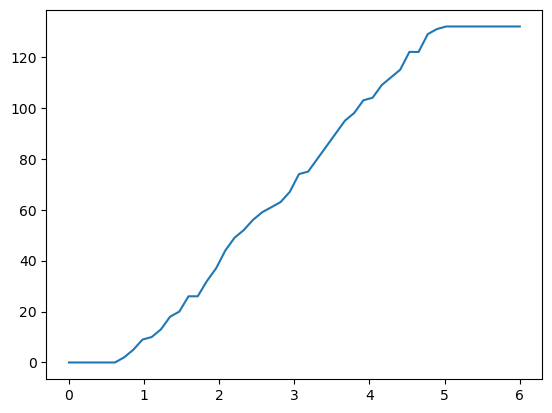

In [53]:
values = np.linspace(0, 6, 50)
plt.plot(values, [(distfiltered_df.distance_diff < s).sum() for s in values])

### Sort&Groupby Time difference first 

In [54]:
filtered_df

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff,time_diff_abs,distance_diff
255815,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:41.450,40.657333,28.970000,0.65,0.65,2.288499
255816,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:42.620,40.664667,28.844667,-0.52,0.52,8.395927
304421,2019-09-08 06:35:21.900,40.8470,27.9378,2019-09-08 06:35:20.990,40.774500,27.977667,0.91,0.91,8.731966
416980,2019-09-11 01:13:16.800,40.2088,27.8635,2019-09-11 01:13:17.630,40.306333,27.875667,-0.83,0.83,10.894244
516748,2019-09-13 04:33:57.400,40.7613,28.7143,2019-09-13 04:33:58.260,40.749000,28.807333,-0.86,0.86,7.954737
...,...,...,...,...,...,...,...,...,...
5442123,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:14.900,40.581333,28.956333,0.80,0.80,1.715020
5442124,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:15.930,40.627500,28.889833,-0.23,0.23,5.995114
5467708,2019-11-27 04:33:24.600,40.6380,28.9168,2019-11-27 04:33:24.620,40.543833,28.960833,-0.02,0.02,11.111399
5609690,2019-11-30 00:14:16.200,40.2027,27.0917,2019-11-30 00:14:15.270,40.081667,26.999500,0.93,0.93,15.573953


In [55]:
filtered_df=filtered_df.sort_values(['kd_orgtime','kd_lat','kd_lon','time_diff'])

In [56]:
groupby_timedist=filtered_df.groupby(['kd_orgtime','kd_lat','kd_lon']).head(1)

In [57]:
groupby_timedist=groupby_timedist.reset_index(drop=True)
groupby_timedist

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff,time_diff_abs,distance_diff
0,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:42.620,40.664667,28.844667,-0.52,0.52,8.395927
1,2019-09-08 06:35:21.900,40.8470,27.9378,2019-09-08 06:35:20.990,40.774500,27.977667,0.91,0.91,8.731966
2,2019-09-11 01:13:16.800,40.2088,27.8635,2019-09-11 01:13:17.630,40.306333,27.875667,-0.83,0.83,10.894244
3,2019-09-13 04:33:57.400,40.7613,28.7143,2019-09-13 04:33:58.290,40.705667,28.637500,-0.89,0.89,8.952246
4,2019-09-13 23:16:30.800,40.0015,26.1360,2019-09-13 23:16:30.610,39.982833,26.596833,0.19,0.19,39.313236
...,...,...,...,...,...,...,...,...,...
301,2019-11-25 12:11:54.100,40.8723,28.2722,2019-11-25 12:11:54.580,40.813333,28.392833,-0.48,0.48,12.081644
302,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:15.930,40.627500,28.889833,-0.23,0.23,5.995114
303,2019-11-27 04:33:24.600,40.6380,28.9168,2019-11-27 04:33:24.620,40.543833,28.960833,-0.02,0.02,11.111399
304,2019-11-30 00:14:16.200,40.2027,27.0917,2019-11-30 00:14:15.270,40.081667,26.999500,0.93,0.93,15.573953


In [58]:
filtered_df=filtered_df.sort_values(['kd_orgtime','kd_lat','kd_lon','distance_diff'])

In [59]:
groupby_disttime=filtered_df.groupby(['kd_orgtime','kd_lat','kd_lon']).head(1)

In [60]:
groupby_disttime=groupby_disttime.reset_index(drop=True)
groupby_disttime

,kd_orgtime,kd_lat,kd_lon,ph_orgtime,ph_lat,ph_lon,time_diff,time_diff_abs,distance_diff
0,2019-09-06 21:35:42.100,40.6637,28.9442,2019-09-06 21:35:41.450,40.657333,28.970000,0.65,0.65,2.288499
1,2019-09-08 06:35:21.900,40.8470,27.9378,2019-09-08 06:35:20.990,40.774500,27.977667,0.91,0.91,8.731966
2,2019-09-11 01:13:16.800,40.2088,27.8635,2019-09-11 01:13:17.630,40.306333,27.875667,-0.83,0.83,10.894244
3,2019-09-13 04:33:57.400,40.7613,28.7143,2019-09-13 04:33:58.260,40.749000,28.807333,-0.86,0.86,7.954737
4,2019-09-13 23:16:30.800,40.0015,26.1360,2019-09-13 23:16:30.610,39.982833,26.596833,0.19,0.19,39.313236
...,...,...,...,...,...,...,...,...,...
301,2019-11-25 12:11:54.100,40.8723,28.2722,2019-11-25 12:11:54.580,40.813333,28.392833,-0.48,0.48,12.081644
302,2019-11-26 19:31:15.700,40.5947,28.9462,2019-11-26 19:31:14.900,40.581333,28.956333,0.80,0.80,1.715020
303,2019-11-27 04:33:24.600,40.6380,28.9168,2019-11-27 04:33:24.620,40.543833,28.960833,-0.02,0.02,11.111399
304,2019-11-30 00:14:16.200,40.2027,27.0917,2019-11-30 00:14:15.270,40.081667,26.999500,0.93,0.93,15.573953


In [61]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [62]:
import folium
m = folium.Map(location=[groupby_disttime['kd_lat'].mean(), groupby_disttime['kd_lon'].mean()], zoom_start=11)

for idx, row in groupby_disttime.iterrows():
    # Katalog noktası mavi marker
    folium.CircleMarker(
        location=[row['kd_lat'], row['kd_lon']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=f"Katalog\nZaman: {row['kd_orgtime']}\nKonum: {row['kd_lat']}, {row['kd_lon']}"
    ).add_to(m)

    # Deprem pick noktası kırmızı marker
    folium.CircleMarker(
        location=[row['ph_lat'], row['ph_lon']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.7,
        popup=f"Deprem Pick\nZaman: {row['ph_orgtime']}\nKonum: {row['ph_lat']}, {row['ph_lon']}"
    ).add_to(m)

    # İki nokta arasına çizgi çiz (isteğe bağlı)
    folium.PolyLine(
        locations=[[row['kd_lat'], row['kd_lon']], [row['ph_lat'], row['ph_lon']]],
        color='gray',
        weight=1,
        opacity=0.5
    ).add_to(m)

# Haritayı kaydet ya da göster
m.save('filtered_map.html')
m


## METRIKLER

TP/FP Precision

In [63]:
groupby_disttime.shape

(306, 9)

In [64]:
TP=len(groupby_disttime)
TP #true positive

306

In [67]:
ph.shape

(1279, 3)

In [68]:
FP= len(ph)-TP #false positive
FP

973

In [69]:
FN=len(kandilli_all)-TP
FN

5626

In [70]:
precision = TP / (TP + FP) if (TP+FP) > 0 else 0
precision

0.23924941360437843

In [71]:
recall    = TP / (TP + FN) if (TP+FN) > 0 else 0
recall


0.05158462575859744

In [72]:
f1 = 2 * (precision * recall) / (precision + recall) if (precision+recall) > 0 else 0
f1

0.08487033698516155

MAE & MSE

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#take the absolute values of time difference and distance difference
#time_abs = groupby_disttime['time_diff'].abs()
#dist_abs = groupby_disttime['distance_diff'].abs()

In [75]:
time_abs = groupby_disttime['time_diff']
dist_abs = groupby_disttime['distance_diff']

In [76]:
#calculate the mean value of time difference & distance difference
mae_time = time_abs.mean()
mae_dist = dist_abs.mean()

In [77]:
#MSE
#büyük hataları daha fazla cezalandırır
#s^2 & km^2
mse_time = (groupby_disttime['time_diff']**2).mean()
mse_dist = (groupby_disttime['distance_diff']**2).mean()

In [78]:
#ROOT mean squared error 
#s & km
rmse_time = np.sqrt(mse_time)
rmse_dist = np.sqrt(mse_dist)

In [79]:
print(f"Time -> MAE={mae_time:.3f}s, RMSE={rmse_time:.3f}s")
print(f"Dist -> MAE={mae_dist:.3f}km, RMSE={rmse_dist:.3f}km")

Time -> MAE=0.009s, RMSE=0.552s
Dist -> MAE=15.827km, RMSE=35.857km


##### HISTOGRAM

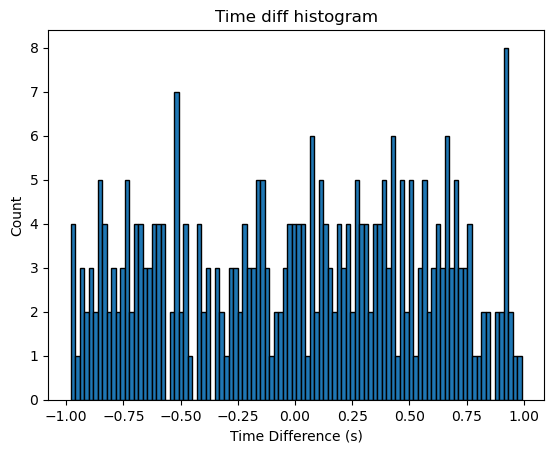

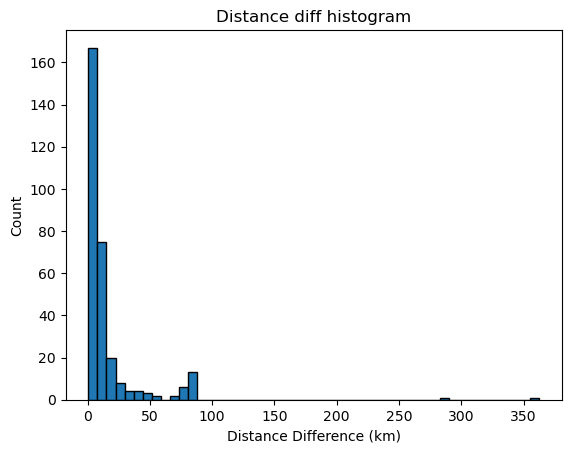

In [83]:
plt.hist(groupby_disttime['time_diff'], bins=100, edgecolor='black')
plt.xlabel("Time Difference (s)")
plt.ylabel("Count")
plt.title("Time diff histogram")
plt.show()

plt.hist(groupby_disttime['distance_diff'], bins=50, edgecolor='black')
plt.xlabel("Distance Difference (km)")
plt.ylabel("Count")
plt.title("Distance diff histogram")
plt.show()


DESCRIBE function

In [81]:
filtered_df.time_diff.describe(percentiles=[0.25,0.5,0.75])

count    413.000000
mean      -0.039104
std        0.548574
min       -0.980000
25%       -0.520000
50%       -0.020000
75%        0.390000
max        0.990000
Name: time_diff, dtype: float64